# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
classes = set()
for i in range(len(y_train)):
    classes.add(y_train[i])
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

7


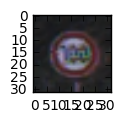

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

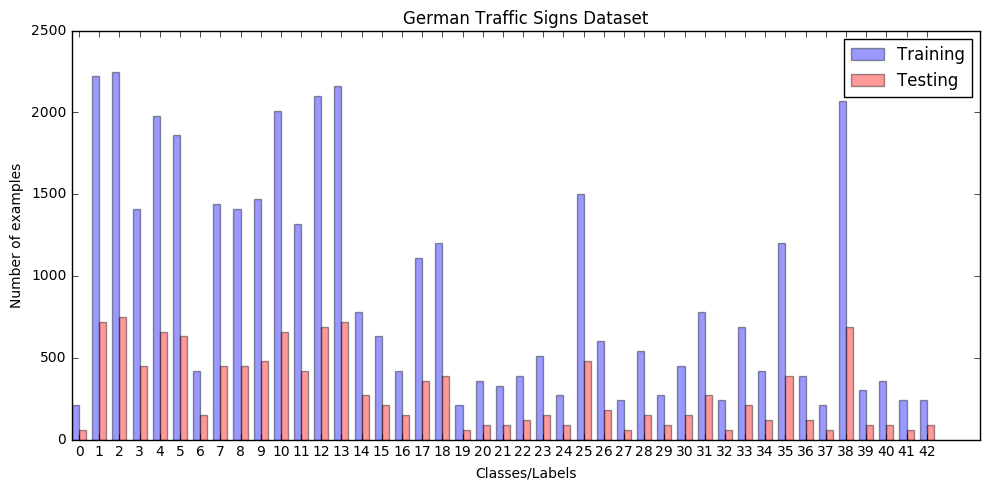

In [4]:
# Resource: http://matplotlib.org/examples/pylab_examples/barchart_demo.html
import numpy as np

index = np.arange(len(classes))
bar_width = 0.35
opacity = 0.4

count_train_per_class = []
for i in range(n_classes):
    count_train_per_class.append(0)
for i in range(len(X_train)):
    label = y_train[i]
    count_train_per_class[label] += 1

count_test_per_class = []
for i in range(n_classes):
    count_test_per_class.append(0)
for i in range(len(X_test)):
    label = y_test[i]
    count_test_per_class[label] += 1

plt.figure(1, [10, 5])

plt.bar(index, count_train_per_class, bar_width, alpha=opacity, color='b', label='Training')
plt.bar(index + bar_width, count_test_per_class, bar_width, alpha=opacity, color='r', label='Testing')

plt.xlabel('Classes/Labels')
plt.ylabel('Number of examples')
plt.title('German Traffic Signs Dataset')
plt.xticks(index + bar_width, classes)
plt.legend()

plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Shuffle the train data
X_train, y_train = shuffle(X_train, y_train)

# Normalize the train and test features
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1.0, 1.0]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -1.0
    b = 1.0
    return a + (image_data - np.amin(image_data)) * (b - a) / (np.amax(image_data) - np.amin(image_data))

X_train = normalize(X_train)
X_test = normalize(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. Shuffled the training data (features and labels).<br>
The ordering of the training data effects the training of the network, so the training set has to be shuffled. sklearn.utils.shuffle shuffles the X_train, y_train matrices in a consistent way. This shuffling has to be done not only during preprocessing, but also when the model is being trained.
2. Normalized the train and test features using Min-Max scaling between -1.0 and 1.0, by implementing the Min-Max scaling function<br>
($X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}$) with the parameters: $a=-1.0$ and $b=1.0$.<br>
This Min-Max scaling for images is demonstrated in the lesson 'Introduction to TensorFlow', part 23 'Normalized Inputs and Initial Weights' and part 35 'Lab: TensorFlow Neural Network'.<br>
We want our inputs to have a mean of zero and equal variance (well-conditioned inputs), this makes it easier for the optimizer to do mathematical computations.
3. Did not One-Hot Encode the labels of the training and testing data during preprocessing.<br>
This encoding will be done during training (training labels) and evaluation (validation and testing labels).

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The German Traffic Signs data has no validation set, so I split the training set into random validation (20%) and train (80%) subsets.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNot(x):
    # Hyperparameters
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(3))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Layer 2: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Dropout.
    conv2 = tf.nn.dropout(conv2, keep_prob)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)
    # Dropout.
    conv3 = tf.nn.dropout(conv3, keep_prob)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Input
The LeNot architecture accepts a 32x32xC image as input, where C is the number of color channels. Since German Traffic Signs images are in color, C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** 1x1 Convolutions. The output shape is 32x32x3.

**Layer 2: Convolutional.** The output shape is 28x28x6.

**Activation.** ReLU.

**Dropout.** 50%

**Pooling.** The output shape is 14x14x6.

**Layer 3: Convolutional.** The output shape is 10x10x16.

**Activation.** ReLU.

**Dropout.** 50%

**Pooling.** The output shape is 5x5x16.

**Flatten.** This has 400 outputs.

**Layer 4: Fully Connected.** This has 120 outputs.

**Activation.** ReLU.

**Layer 5: Fully Connected.** This has 84 outputs.

**Activation.** ReLU.

**Layer 6: Fully Connected (Logits).** This has 43 outputs.

### Output
Return the result of the 3rd fully connected layer.

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 25
BATCH_SIZE = 256

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = LeNot(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenot')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.201

EPOCH 2 ...
Validation Accuracy = 0.406

EPOCH 3 ...
Validation Accuracy = 0.563

EPOCH 4 ...
Validation Accuracy = 0.702

EPOCH 5 ...
Validation Accuracy = 0.777

EPOCH 6 ...
Validation Accuracy = 0.798

EPOCH 7 ...
Validation Accuracy = 0.854

EPOCH 8 ...
Validation Accuracy = 0.893

EPOCH 9 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.930

EPOCH 11 ...
Validation Accuracy = 0.937

EPOCH 12 ...
Validation Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.959

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.968

EPOCH 18 ...
Validation Accuracy = 0.964

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.967

EPOCH 21 ...
Validation Accuracy = 0.972

EPOCH 22 ...
Validation Accuracy = 0.976

EPOCH 23 ...
Validation Accuracy = 0.979

EPOCH 24 ...
Validation Accura

In [9]:
# Evaluate the performance of the model on the test set.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.904


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

optimizer: AdamOptimizer<br>
batch size: 256<br>
epochs: 25<br>
learning rate: 0.001<br>
mu: 0<br>
sigma: 0.05

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I built upon the implementation in lesson 'Traffic Sign Classifier' part 11 'LeNet for Traffic Signs', because this already performed well. In this lesson the LeNet lab was adjusted for classifying traffic sign images and I renamed the network to LeNot.
I fiddled with the batch size, epochs, learning rate and hyperparameters.
As the first layer I made use of 1x1 Convolutions to make the model deeper.
I also added dropouts to the network to prevent overfitting.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

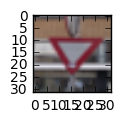

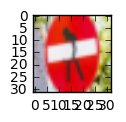

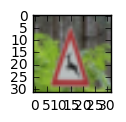

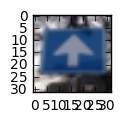

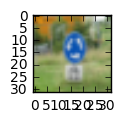

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import scipy.misc

image_names = ['13_Yield.jpg', '17_No_entry.jpg', '31_Wild_animals_crossing.jpg',
               '35_Ahead_only.jpg', '40_Roundabout_mandatory.jpg']
images = []

for image_name in image_names:
    image = plt.imread('./images/'+ image_name)
    images.append(scipy.misc.imresize(image, (32, 32)))

for image in images:
    plt.figure(figsize=(1,1))
    plt.imshow(image.squeeze())

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I took pictures of Dutch traffic signs.<br>
'17_No_entry.jpg' and '40_Roundabout_mandatory.jpg' would probably be difficult to classify.
The former because it is changed a little by sticking a doll on it. The latter because this type of sign was not very frequently present in the training set and on this particular picture there is another sign below.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


In [11]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_test_new_images = normalize(np.array(images))

softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    prediction = sess.run(softmax, feed_dict={x: X_test_new_images, keep_prob: 1.0})
    print(prediction)

[[  1.54545091e-06   1.12654889e-05   4.34338563e-06   2.62630463e-04
    2.49245371e-08   6.88176442e-07   3.37902761e-10   1.40361078e-06
    1.29605013e-07   6.76714582e-04   6.70564987e-05   1.10666213e-06
    9.68878521e-06   9.96746421e-01   2.90727303e-06   5.94861785e-06
    8.11266361e-08   3.64678431e-06   1.42820667e-07   1.62913111e-05
    8.63734294e-06   5.93716913e-06   4.13582951e-04   1.05010360e-04
    3.63484318e-08   2.94365367e-04   5.84501834e-07   5.01886810e-10
    2.40656213e-04   9.42354556e-04   2.33281799e-06   2.23345105e-05
    4.42455530e-06   5.53682924e-07   1.00777550e-06   1.21410660e-04
    1.88796866e-06   1.11772536e-09   2.22807303e-05   5.06531084e-09
    1.98167385e-07   2.70861165e-07   6.05435257e-09]
 [  1.00245830e-02   2.80116319e-06   1.92608720e-08   3.83498205e-04
    6.26780960e-10   4.45584930e-10   2.15752222e-16   1.61318539e-07
    2.72805266e-07   2.15402921e-03   9.44883880e-07   3.90952166e-11
    7.33675898e-11   2.77384520e-01 

**Answer:**

By looking at the output below, the signs with labels 13, 17, 31, and 35 are all on position 1 of the top 3. The sign with label 40, on the other hand, is on position 2 of the top 3.<br>
So the model predicted initially 4 out of 5 signs correctly, it is 80% accurate.<br>
However, the model prediction accuracy on the testing set was 90.4%.<br>
A reason for this difference could be that the model was only tested on five images of Dutch traffic signs. When testing it on more images the accuracy could improve... or worsen.<br>
Furthermore, Dutch traffic signs differ slightly from their German counterparts in color grade and shape of the symbols, that the model was not trained on.<br>
As a result, I believe my model will perform well in the real world (German) situation.

In [12]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top_k = sess.run(tf.nn.top_k(prediction, k=3))
    print(top_k)

TopKV2(values=array([[  9.96746421e-01,   9.42354556e-04,   6.76714582e-04],
       [  6.16760552e-01,   2.77384520e-01,   6.68750480e-02],
       [  2.40136489e-01,   1.95078418e-01,   9.97336581e-02],
       [  9.64757383e-01,   3.09645999e-02,   2.72015389e-03],
       [  3.14950734e-01,   2.86361486e-01,   2.59159744e-01]], dtype=float32), indices=array([[13, 29,  9],
       [17, 13, 22],
       [31, 21, 11],
       [35, 34, 33],
       [ 2, 40,  1]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Looking at the output of cell 12, the model is:

- 99.67% (9.96746421e-01) certain that '13_Yield.jpg' is a sign with label 13 --> Certain
- 61.67% (6.16760552e-01) certain that '17_No_entry.jpg' is a sign with label 17 --> Certain
- 24.01% (2.40136489e-01) certain that '31_Wild_animals_crossing.jpg'  is a sign with label 31 --> Uncertain
- 96.47% (9.64757383e-01) certain that '35_Ahead_only.jpg' is a sign with label 35 --> Certain
- 28.63% (2.86361486e-01) certain that '40_Roundabout_mandatory.jpg' is a sign with label 40 --> Uncertain

Although the model was incorrect in its initial prediction of '40_Roundabout_mandatory.jpg', the correct prediction appears in the top 3 on position 2.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.